In [1]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

In [2]:
import os
os.getcwd()

'C:\\Users\\Yuvraj'

In [8]:
gestures = ['palm', 'l', 'fist', 'fist_moved', 'thumb', 'index', 'ok', 'palm_moved', 'c', 'down']  # 10 classes
base_dir = "C:/Users/Yuvraj/OneDrive/Desktop/dataset/leapGestRecog"  # Update this

def load_gestures(base_dir):
    X = []  # Images
    y = []  # Labels
    for subject in range(10):  # 00 to 09
        subject_dir = os.path.join(base_dir, f'{subject:02d}')
        for i, gesture in enumerate(gestures):
            folder = os.path.join(subject_dir, f'{i+1:02d}_{gesture}')
            for file in os.listdir(folder):
                if file.endswith('.png'):
                    img_path = os.path.join(folder, file)
                    img = cv2.imread(img_path)  # Load in BGR
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # To RGB for Keras
                    img = cv2.resize(img, (128, 128)) / 255.0  # Resize and normalize
                    X.append(img)
                    y.append(i)  # Label as integer
    return np.array(X), np.array(y)

X, y = load_gestures(base_dir)
y = to_categorical(y, num_classes=10)  # One-hot: e.g., [0,0,1,0...] for class 2

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}')

Training samples: 16000, Test samples: 4000


In [9]:
datagen = ImageDataGenerator(
    rotation_range=20,  # Rotate images
    width_shift_range=0.2, height_shift_range=0.2,  # Shift
    shear_range=0.2, zoom_range=0.2,  # Distort and zoom
    horizontal_flip=True,  # Flip
    fill_mode='nearest'  # Fill pixels
)
datagen.fit(X_train)  # Apply to training data

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),  # 32 filters, detect basic features
    MaxPooling2D((2, 2)),  # Reduce size by half
    Conv2D(64, (3, 3), activation='relu'),  # Deeper features
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),  # More complex patterns
    MaxPooling2D((2, 2)),
    Flatten(),  # Convert to 1D vector
    Dense(128, activation='relu'),  # Fully connected layer
    Dropout(0.5),  # Drop 50% neurons to prevent overfitting
    Dense(10, activation='softmax')  # Output: probabilities for 10 classes
])

model.compile(optimizer='adam',  # Adaptive optimizer
              loss='categorical_crossentropy',  # For multi-class
              metrics=['accuracy'])  # Track accuracy


In [12]:
history = model.fit(
    datagen.flow(X_train, y_train, batch_size=32),
    epochs=20,
    validation_data=(X_test, y_test)
)

C:\Users\Yuvraj\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 119s 234ms/step - accuracy: 0.3053 - loss: 1.8870 - val_accuracy: 0.9415 - val_loss: 0.2703
Epoch 2/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 113s 226ms/step - accuracy: 0.7715 - loss: 0.6758 - val_accuracy: 0.9610 - val_loss: 0.1530
Epoch 3/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 222ms/step - accuracy: 0.8721 - loss: 0.3884 - val_accuracy: 0.9927 - val_loss: 0.0410
Epoch 4/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 113s 225ms/step - accuracy: 0.9132 - loss: 0.2652 - val_accuracy: 0.9923 - val_loss: 0.0289
Epoch 5/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 115s 230ms/step - accuracy: 0.9336 - loss: 0.2187 - val_accuracy: 0.9880 - val_loss: 0.0541
Epoch 6/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 112s 223ms/step - accuracy: 0.9460 - loss: 0.1686 - val_accuracy: 0.9948 - val_loss: 0.0145
Epoch 7/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 222ms/step - accuracy: 0.9598 - loss: 0.1227 - val_accuracy: 0.9970 - val_loss: 0.0141
Epoch 8/20
500/500 ━━━━━━━━━━━━━━━━━━━━ 111s 223ms/step - accuracy: 0.9603 -

In [6]:
model.save('gesture_model.h5')
print("Model saved locally as 'gesture_model.h5'")

NameError: name 'model' is not defined

In [7]:
from tensorflow.keras.models import load_model
loaded_model = load_model('gesture_model.h5')
print("Model loaded successfully")

Model loaded successfully


125/125 ━━━━━━━━━━━━━━━━━━━━ 6s 44ms/step
Classification Report:
              precision    recall  f1-score   support

        palm       1.00      1.00      1.00       417
           l       1.00      1.00      1.00       404
        fist       1.00      1.00      1.00       404
  fist_moved       1.00      1.00      1.00       418
       thumb       1.00      1.00      1.00       377
       index       1.00      1.00      1.00       392
          ok       1.00      1.00      1.00       403
  palm_moved       1.00      1.00      1.00       409
           c       1.00      1.00      1.00       410
        down       1.00      1.00      1.00       366

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



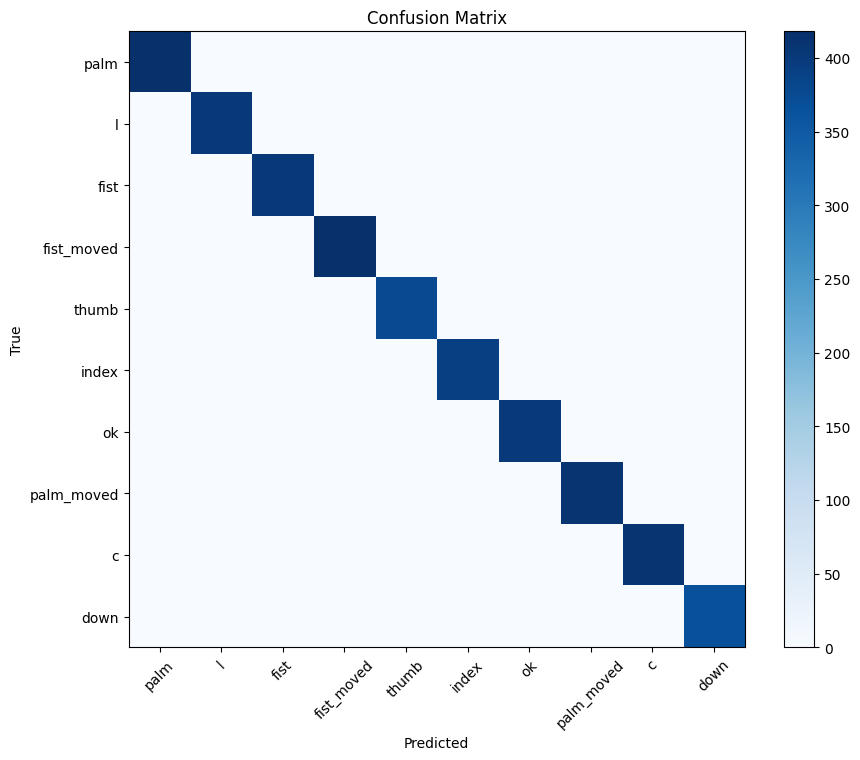

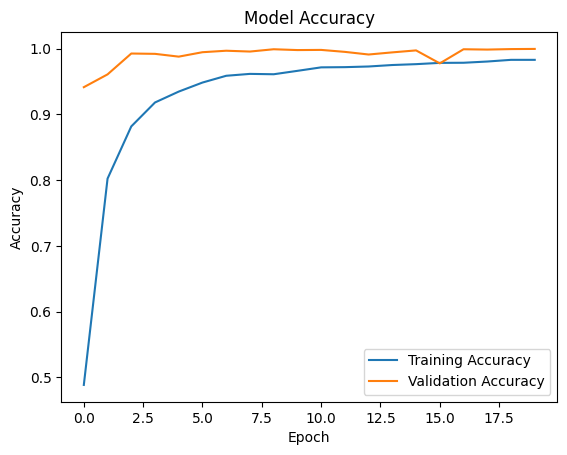

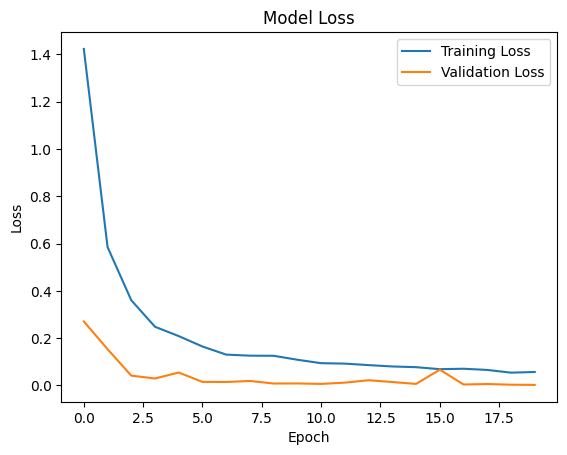

In [15]:
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

print("Classification Report:")
print(classification_report(y_true, y_pred_classes, target_names=gestures))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xticks(np.arange(10), gestures, rotation=45)
plt.yticks(np.arange(10), gestures)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Plot Training History (if stored)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [16]:
sample_pred = loaded_model.predict(X_test[:1])  # Predict on first test sample
print(f"Predicted gesture index: {np.argmax(sample_pred)}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step
Predicted gesture index: 3


In [ ]:
import cv2
import numpy as np
cap = cv2.VideoCapture(0)
if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        print("Error: Could not read frame.")
        break
model = keras.models.load_model("C:/Users/Yuvraj/gesture_model.h5")
    # Preprocess frame
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = cv2.resize(frame_rgb, (128, 128)) / 255.0
    input_img = np.expand_dims(resized, axis=0)  # Add batch dimension

    # Predict
    pred = model.predict(input_img)
    gesture_idx = np.argmax(pred)
    gesture = gestures[gesture_idx]
    confidence = np.max(pred) * 100  # Confidence percentage

    # Display on frame
    cv2.putText(frame, f'{gesture} ({confidence:.1f}%)', (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Hand Gesture Recognition', frame)

    # Break loop with 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

NameError: name 'model' is not defined